Задание № 1 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.



Statistics=4343.000, p=0.054


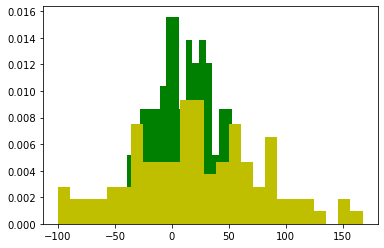

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


np.random.seed(11)
A = st.norm.rvs(scale=30, loc=11, size=100)
B = A + st.norm.rvs(scale=54, loc=11, size=100)
plt.hist(A, bins=25, density = True, color='g')
plt.hist(B, bins=25, density = True, color='y')

stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# С уровнем доверия 95% различия в  эфектах нет


Задание № 2 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
А - группа людей без препарата.

B - та же группа людей, но получающая препарат

Statistics=1930.000, p=0.041


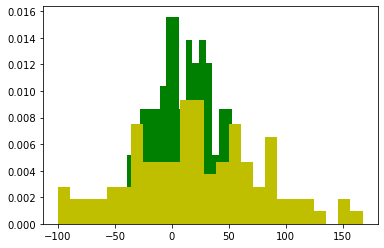

In [12]:
from scipy.stats import wilcoxon
np.random.seed(11)
A = st.norm.rvs(scale=30, loc=11, size=100)
B = A + st.norm.rvs(scale=54, loc=11, size=100)
plt.hist(A, bins=25, density = True, color='g')
plt.hist(B, bins=25, density = True, color='y')
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# С уровнем доверия 95% различия в  эфектах есть

Задание № 3 Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

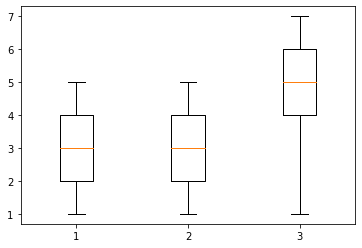

12.525963044834198 2.924004790632673e-05


In [17]:
from scipy.stats import f_oneway 
import seaborn as sns

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

plt.boxplot([water,  mineral, nutri])
plt.show()
F, p = f_oneway(water,  mineral, nutri)
print(F, p) 
# Разница между выборками значима, лучшие результаты получаем для удобрений

Cookie Cats

In [3]:

cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [ ]:
# выборка достаточно велика чтоб делать выводы. Хорошо что в обоих выборках приблизительно одинаковое количиство 
# результатов

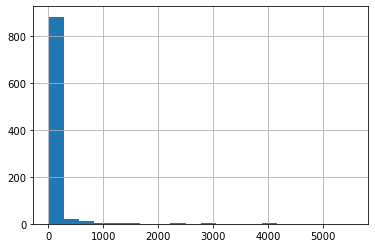

In [7]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=20)  # попробуйте поварировать параметр bins
plt.show()



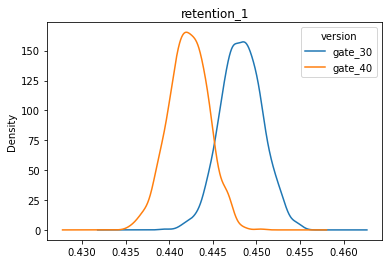

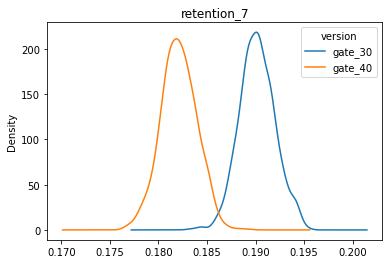

In [17]:

# # Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density', title="retention_1")
plt.show()

# # Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_7d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot(kind='density', title="retention_7")
plt.show()

In [ ]:
# Среднии для retention_1 и retention_7 давольно близки, для gate_30  юзеры в среднем заходят в игру чуть чаще
#Честно не понял для чего в данном случае используетя бутстрэп, вроде объём выборок достаточно большой. 
# Или тут какие-то другие предпосылки?


Среднии по версиям для sum_gamerounds
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64


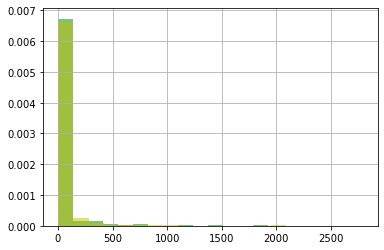

Statistics=4343.000, p=0.054


In [29]:

from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

print("Среднии по версиям для sum_gamerounds")
print(data.groupby("version")["sum_gamerounds"].mean())

plot_df = data[data['version']=='gate_30'].groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=20, density = True, color="g", alpha=0.5)  # попробуйте поварировать параметр bins

plot_df = data[data['version']=='gate_40'].groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=20, density = True, color="y", alpha=0.5)  # попробуйте поварировать параметр bins
plt.show()

#распределеня по 'sum_gamerounds' очень похожи, такое впечатление что нет разницы где ставить ворота 
stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# не можем сказать что различия по "sum_gamerounds" значимы


In [19]:
ret_1_g30_mean = data[data['version']=='gate_30']["retention_1"].mean()
ret_1_g40_mean = data[data['version']=='gate_40']["retention_1"].mean()
print("ret_1_g30_mean:",ret_1_g30_mean)
print("ret_1_g40_mean:",ret_1_g40_mean)
ret_7_g30_mean = data[data['version']=='gate_30']["retention_7"].mean()
ret_7_g40_mean = data[data['version']=='gate_40']["retention_7"].mean()
print("ret_7_g30_mean:",ret_7_g30_mean)
print("ret_7_g40_mean:",ret_7_g40_mean)

#Среднии значения давольно близки, для gate_30 значения немного выше 

ret_1_g30_mean: 0.4481879194630872
ret_1_g40_mean: 0.44228274967574577
ret_7_g30_mean: 0.19020134228187918
ret_7_g40_mean: 0.18200004396667327


In [23]:
# проверим слуайны ли различия для retention_1 и retention_7

#таблица сопряженности для retention_1
ret_1_g30 = data[data['version']=='gate_30']["retention_1"]
ret_1_g40 = data[data['version']=='gate_40']["retention_1"]
ret_1_g30_visit = ret_1_g30.sum()
ret_1_g40_visit = ret_1_g40.sum()
ret_1_g30_notvisit = ret_1_g30.count() - ret_1_g30_visit
ret_1_g40_notvisit = ret_1_g40.count() - ret_1_g40_visit
ret1_cont_matrix = [[ret_1_g30_visit, ret_1_g30_notvisit], [ret_1_g40_visit, ret_1_g40_notvisit]]
print("ret1_cont_matrix: ", ret1_cont_matrix)

#таблица сопряженности для retention_7
ret_7_g30 = data[data['version']=='gate_30']["retention_7"]
ret_7_g40 = data[data['version']=='gate_40']["retention_7"]
ret_7_g30_visit = ret_7_g30.sum()
ret_7_g40_visit = ret_7_g40.sum()
ret_7_g30_notvisit = ret_7_g30.count() - ret_7_g30_visit
ret_7_g40_notvisit = ret_7_g40.count() - ret_7_g40_visit
ret7_cont_matrix = [[ret_7_g30_visit, ret_7_g30_notvisit], [ret_7_g40_visit, ret_7_g40_notvisit]]
print("ret1_cont_matrix: ", ret7_cont_matrix)



ret1_cont_matrix:  [[20034, 24666], [20119, 25370]]
ret1_cont_matrix:  [[8502, 36198], [8279, 37210]]


In [26]:
ret1_res = stats.chi2_contingency(ret1_cont_matrix, correction=True)
print("Statistic value for retention_1: ", ret1_res[1])

ret7_res = stats.chi2_contingency(ret7_cont_matrix, correction=True)
print("Statistic value for retention_7: ", ret7_res[1])
#при уровне значимости 5%  разлиия для retention_1  для gate_30  и gate_40 не значимы
#при уровне значимости 5%  разлиия для retention_7  для gate_30  и gate_40  значимы



Statistic value for retention_1:  0.07550476210309086
Statistic value for retention_7:  0.0016005742679058301


In [27]:
#Итого: 
# не можем сказать что различия по "sum_gamerounds" значимы
# различия для retention_1  для gate_30  и gate_40 не значимы
# различия для retention_7  для gate_30  и gate_40  значимы
# Среднее по retention_7 незначительно больше для gate_30. 
# Могу предположить что gate_30 лучше, хотя различия незначительны